# Lab 1-2: Part 1

## ArcPy

In [ ]:
### 1

# Import libraries

import arcpy

In [ ]:
### 2

# Create Feature Class

In [ ]:
### 3

# Add point & line

In [ ]:
### 4

### 5

### 6

### 7

### 8

### 9

## Fiona/Shapely

In [1]:
### 1

# Import libraries

import numpy as np # Creating data
import shapely as shp # Creating shapes
import geopandas as gpd # Spatial Data Management

In [2]:
### 2

# Create data

# Fields

columns = ['col1', 'col2']

col1_vals = np.array([1,2,3])
col2_vals = np.array([1,2,3])

data = np.array([col1_vals,col2_vals]).T

# Geometry

pt = shp.geometry.Point(475025.028, 4974084.696) # Point
line = shp.geometry.LineString([(479025.028, 4979084.696),
                                (475025.028, 4974084.696)]) # Line
polygon = gpd.read_file('mpls_boundary.geojson').geometry[0] # Polygon, Importing GeoJson from file

shapes = gpd.GeoSeries([pt, line, polygon],
                      crs = 'EPSG:26915')

In [3]:
### 3

# Create Feature Class (GeoDataFrame)

gdf = gpd.GeoDataFrame(data,
                       columns = columns, 
                       geometry = shapes)

In [4]:
### 4

# Show rows of data

gdf.head()

,col1,col2,geometry
0,1,1,POINT (475025.028 4974084.696)
1,2,2,"LINESTRING (479025.028 4979084.696, 475025.028..."
2,3,3,"POLYGON ((474025.028 4974084.696, 474030.014 4..."


<AxesSubplot: >

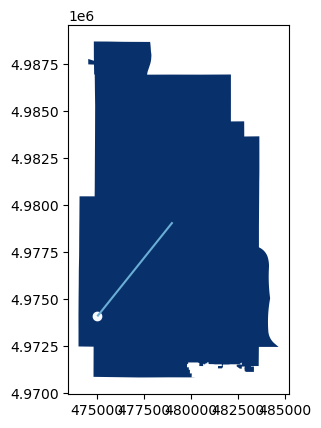

In [5]:
### 5

# Check out the shapes!

shapes.plot(cmap='Blues')

In [6]:
### 6

# Summarize

gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   col1      3 non-null      int64   
 1   col2      3 non-null      int64   
 2   geometry  3 non-null      geometry
dtypes: geometry(1), int64(2)
memory usage: 200.0 bytes


In [7]:
### 7

# Save

# Shapefile
# gdf.to_file('shape_shp.shp')

# GeoDataBase
# gdf.to_file("shape_gdf.gdf") # Error can't mix the vector types?

# GeoJSON
# gdf.to_file('shapes_GeoJSON.geojson')


In [8]:
### 8

# To WKT

wkts = [x.wkt for x in shapes]

# Open file in write mode
with open(r'shapes_wkt.txt', 'w') as file:
    for wkt in wkts:
        # write each wkt on new line
        file.write("%s\n" % wkt)

In [9]:
### 9

# Import from wkt

# Open shapes_wkt.txt
with open(r'shapes_wkt.txt', 'r') as file:
    loaded_wkts = file.readlines()
    
    
# Remove new line characters
for loaded_wkt in loaded_wkts:
    wkts += [loaded_wkt[:-2]]
                 
wkts

['POINT (475025.028 4974084.696)',
 'LINESTRING (479025.028 4979084.696, 475025.028 4974084.696)',
 'POLYGON ((474025.0278000003 4974084.695699999, 474030.01439999975 4974888.4584, 474033.3877999997 4975288.758400001, 474038.2578999996 4975680.262800001, 474043.3326000003 4976495.1042, 474052.6638000002 4976971.577199999, 474058.6185999997 4977275.640699999, 474061.58669999987 4977677.6227, 474063.01690000016 4977871.4055, 474063.91779999994 4978159.715500001, 474068.70579999965 4978778.8927, 474072.1671000002 4979125.670299999, 474073.84219999984 4979277.107100001, 474082.16779999994 4980463.6108, 474884.9151999997 4980462.6403, 474888.73139999993 4980860.619899999, 474890.9757000003 4981221.7786, 474893.1470999997 4981571.318700001, 474896.84729999956 4982267.887, 474901.2156999996 4983070.4232, 474904.9682 4983671.002800001, 474908.1573999999 4984461.6688, 474908.33050000016 4984504.5211, 474908.3317999998 4984504.8486, 474909.8145000003 4984872.306299999, 474911.4347000001 4985273.